In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
from numpy import log as ln
from datetime import datetime
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
from ast import literal_eval 
from pandas.io.json import json_normalize
from sklearn import linear_model
from linearmodels.datasets import wage_panel

In [183]:
df = pd.read_csv(r'C:\Users\kentj\Desktop\8Props\Resale from May 2016 to May 2021\Privateresale1(EDA).csv')
df.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99


In [184]:
df.shape

(120925, 20)

## Preprocessing 
1. Drop Useless columns and make all the variables numeric 

In [185]:
df['Postal_District'] = pd.Categorical(df['Postal_District'])

In [186]:
df1 = pd.get_dummies(df[['Type', 'Market_Segment', 'Type_of_Sale', 'Type_of_Area', 'Postal_District']])
df1.head()

,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [187]:
df = pd.concat([df, df1], axis = 1)
df.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Comments
1. What we will be attempting to do here, is to get the Floor Level to numeric types. 
2. Certain units do not have floor levels (for eg. landed property), they will have a - in the column Floor_Level. Hence, if the Floor Level is -, then we will return 01. 

In [188]:
def function(x):
    if x != '-':
        return x[:2]
    else:
        return '01'

In [189]:
df['storey1'] = df['Floor_Level'].apply(function) # the lower end of the floor level, since the floor leve given is a range 

In [190]:
def storey_2(y):
    if y != '-':
        return y[-2:]
    else:
        return '01'

In [191]:
df['storey2'] = df['Floor_Level'].apply(storey_2) # the higher end of the floor level, since the floor level given is a range

# Comments
1. The columns are not entirely cleaned, as there is 15 rows with B1 to B5, and they are not in numeric terms. 
2. We will treat them as the ground floor, hence returning the value of 01, if they have B1 to B5 as their floor level. 

In [192]:
def function1(x):
    if x == 'B1':
        return '01'
    else:
        return x

df['storey1'] = df['storey1'].apply(function1)

In [193]:
def function2(x):
    if x == 'B5':
        return '01'
    else:
        return x
df['storey2'] = df['storey2'].apply(function2)

In [194]:
df['storey1'].value_counts() , df['storey2'].value_counts() #data is cleaned

(01    50305
 06    29017
 11    20762
 16     9882
 21     4590
 26     2793
 31     1972
 36      967
 41      334
 46      148
 51       65
 56       37
 61       29
 66       20
 71        4
 Name: storey1, dtype: int64,
 05    39561
 10    29017
 15    20762
 01    10744
 20     9882
 25     4590
 30     2793
 35     1972
 40      967
 45      334
 50      148
 55       65
 60       37
 65       29
 70       20
 75        4
 Name: storey2, dtype: int64)

In [195]:
df['storey1'] = df['storey1'].astype(int) #converting to int
df['storey2'] = df['storey2'].astype(int)

df['avg_storey'] = (df['storey1'] + df['storey2']) / 2 # getting average 
df['avg_storey'].astype(int)
df.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28,storey1,storey2,avg_storey
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,23.0
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,23.0
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,10,8.0
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,23.0
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3.0


In [196]:
df = df.dropna(subset = ['tenure_start']) #dropping these rows, since it is missing values 

In [197]:
 df['lease_years'].value_counts() #since freehold is the only str variable, we will assign it to an arbituary large value, so we can 
    #define a new dummy column for freehold with years above 800 

99          82051
Freehold    33649
999          4161
956           293
103           248
60            100
946            91
102            67
100            54
929            46
9999           32
947            31
70             25
110            24
101            19
85              7
999999          6
993             5
998             3
89              3
945             2
940             1
97              1
93              1
104             1
Name: lease_years, dtype: int64

In [198]:
df['lease_years']  = ['999' if x == 'Freehold' else x for x in df['lease_years']]

In [199]:
df['lease_years'] = df['lease_years'].astype(int)

In [200]:
df['freehold'] = ['1' if x > 800 else '0' for x in df['lease_years']]
df.head()

,S/N,Project_Name,Street_Name,Type,Postal_District,Market_Segment,Tenure,Type_of_Sale,No._of_Units,Price_($),Nett_Price_($),Area_(Sqft),Type_of_Area,Floor_Level,Unit_Price_($psf),Date_of_Sale,year,month,tenure_start,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28,storey1,storey2,avg_storey,freehold
0,1,ICON,GOPENG STREET,Apartment,2,CCR,99 yrs lease commencing from 2002,Resale,1,1540000,-,915,Strata,21 to 25,1683,2021-05-01,2021,5,2002,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,23.0,0
1,2,PRINCIPAL GARDEN,PRINCE CHARLES CRESCENT,Condominium,3,RCR,99 yrs lease commencing from 2014,Resale,1,3988888,-,2002,Strata,21 to 25,1992,2021-05-01,2021,5,2014,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,23.0,0
2,3,THE PEARL @ MOUNT FABER,MOUNT FABER ROAD,Condominium,4,RCR,99 yrs lease commencing from 2002,Resale,1,1788000,-,1389,Strata,06 to 10,1288,2021-05-01,2021,5,2002,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,10,8.0,0
3,4,ONE SHENTON,SHENTON WAY,Apartment,1,CCR,99 yrs lease commencing from 2005,Resale,1,1450000,-,1001,Strata,21 to 25,1448,2021-05-01,2021,5,2005,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,25,23.0,0
4,5,THE OCEANFRONT @ SENTOSA COVE,OCEAN DRIVE,Condominium,4,CCR,99 yrs lease commencing from 2005,Resale,1,2780000,-,1873,Strata,01 to 05,1484,2021-05-01,2021,5,2005,99,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3.0,0


In [201]:
df['freehold'].value_counts()

0    82601
1    38320
Name: freehold, dtype: int64

In [202]:
df1 = df.drop(columns = ['S/N','Project_Name', 'Street_Name', 'Type', 'Postal_District', 'Market_Segment', 'Type_of_Sale', 'Nett_Price_($)'
                       , 'No._of_Units', 'Type_of_Area', 'Floor_Level', 'Unit_Price_($psf)', 'Date_of_Sale', 'Tenure', 'storey1', 'storey2', 'tenure_start'])
df1.head()

,Price_($),Area_(Sqft),year,month,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28,avg_storey,freehold
0,1540000,915,2021,5,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,0
1,3988888,2002,2021,5,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,0
2,1788000,1389,2021,5,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,0
3,1450000,1001,2021,5,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,0
4,2780000,1873,2021,5,99,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0


In [167]:
df['lease_years'].value_counts() 

99        82051
999       37810
956         293
103         248
60          100
946          91
102          67
100          54
929          46
9999         32
947          31
70           25
110          24
101          19
85            7
999999        6
993           5
998           3
89            3
945           2
93            1
104           1
940           1
97            1
Name: lease_years, dtype: int64

In [203]:
df1['freehold'] = df1['freehold'].astype(int)

In [204]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Price_($),Area_(Sqft),year,month,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28,avg_storey,freehold
Price_($),1.000000,0.930896,0.003632,-0.004464,0.007563,-0.015514,-0.007029,0.110485,-0.035822,0.039668,0.004955,0.007690,0.008339,0.020885,0.084689,-0.058061,-0.003164,-0.052643,0.054595,-0.009030,0.081061,-0.081061,0.006123,0.004471,-0.004886,0.012921,-0.011985,0.023764,0.003098,-0.006122,0.030311,0.078058,0.026963,-0.007289,-0.003667,-0.011828,0.015695,-0.007225,-0.008269,-0.020446,-0.021763,-0.001117,0.008825,-0.012130,-0.019746,-0.012316,0.000055,-0.020411,-0.001440,-0.014605,0.075973
Area_(Sqft),0.930896,1.000000,-0.009722,-0.000871,0.005055,-0.039891,-0.014697,0.125790,-0.015236,0.053522,0.018372,0.027648,0.035415,0.027426,0.036912,-0.011840,-0.016018,-0.072181,0.074218,-0.009534,0.098955,-0.098955,-0.004033,-0.006142,-0.015955,0.009781,-0.012863,0.071575,-0.008634,-0.006762,0.000799,0.045554,0.021884,-0.007315,-0.004426,-0.012459,0.012785,0.002932,0.000594,-0.010048,-0.007123,0.001487,0.009813,-0.004954,-0.007362,-0.002060,0.005906,-0.006752,0.008313,-0.043912,0.061830
year,0.003632,-0.009722,1.000000,-0.259853,0.001433,0.145779,-0.106940,0.006740,-0.066337,0.009017,0.001145,0.010288,-0.005331,0.012224,0.021989,-0.064610,0.053028,-0.038285,0.045938,-0.034323,0.016814,-0.016814,0.011445,0.008243,-0.024483,0.030565,0.061699,0.003252,0.092314,-0.014279,-0.006626,-0.008732,-0.001107,-0.018855,0.007448,0.011177,-0.011033,-0.035024,0.027344,0.053779,-0.010563,0.013649,0.064550,-0.081208,-0.052429,-0.033269,0.004564,-0.061323,-0.001720,-0.014323,0.008421
month,-0.004464,-0.000871,-0.259853,1.000000,-0.003502,0.001529,0.014290,0.004793,-0.034922,0.003118,0.002087,-0.003598,0.002455,0.010190,-0.018165,0.003080,0.010868,-0.017905,0.015353,0.011251,0.011674,-0.011674,-0.002490,0.003120,0.026608,-0.028077,-0.025392,0.000827,-0.068693,-0.004233,-0.005433,0.004399,0.007297,-0.002221,0.014676,0.025523,-0.015545,-0.025025,-0.005540,-0.041159,0.026585,0.021561,0.020998,0.014023,0.005299,0.006028,-0.002721,-0.008330,0.018481,-0.007591,0.014202
lease_years,0.007563,0.005055,0.001433,-0.003502,1.000000,0.012968,-0.011429,0.006586,-0.016854,0.008973,0.001970,0.002192,0.001891,0.012229,0.013067,-0.021073,0.012681,-0.030276,0.028825,0.006272,0.021469,-0.021469,-0.004188,0.000127,-0.010534,-0.004597,-0.007236,-0.000337,-0.004922,0.026371,0.007457,0.012213,0.009746,0.006881,-0.003025,0.010907,0.017714,-0.003605,0.002593,-0.012553,-0.008361,-0.002990,0.007378,-0.006877,-0.005470,-0.005353,0.003333,-0.008909,-0.000649,-0.020106,0.070126
Type_Apartment,-0.015514,-0.039891,0.145779,0.001529,0.012968,1.000000,-0.665309,-0.072170,-0.259696,-0.110257,-0.020525,-0.035830,-0.077160,-0.155411,0.100129,-0.234533,0.176594,0.236524,-0.240299,0.018328,-0.207188,0.207188,0.114937,0.122921,0.084744,-0.087399,0.163402,0.009573,0.144610,0.030256,0.058878,-0.023776,0.003428,0.086297,-0.002016,0.162850,0.066162,-0.111901,-0.061924,-0.199733,0.040733,-0.089402,-0.045769,-0.092740,-0.058195,-0.083554,-0.035879,-0.123013,-0.074520,0.164969,0.050328
Type_Condominium,-0.007029,-0.014697,-0.106940,0.014290,-0.011429,-0.665309,1.000000,-0.088669,-0.319064,-0.135463,-0.025217,-0.044021,-

# Columns which require normalization... 
1. Area_(Sqft)
2. avg_storey

C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


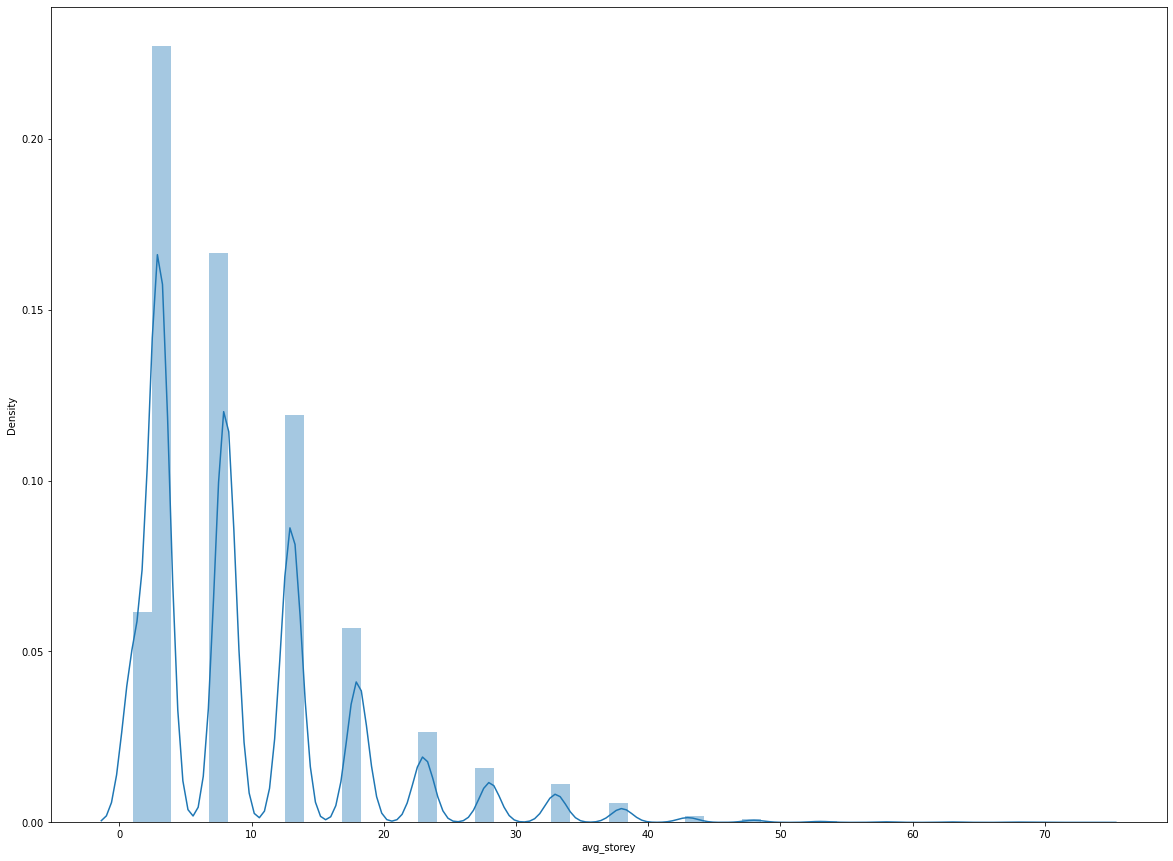

In [205]:
plt.figure(figsize= (20, 15))
sns.distplot(df1['avg_storey']);

C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Area_(Sqft)', ylabel='Density'>

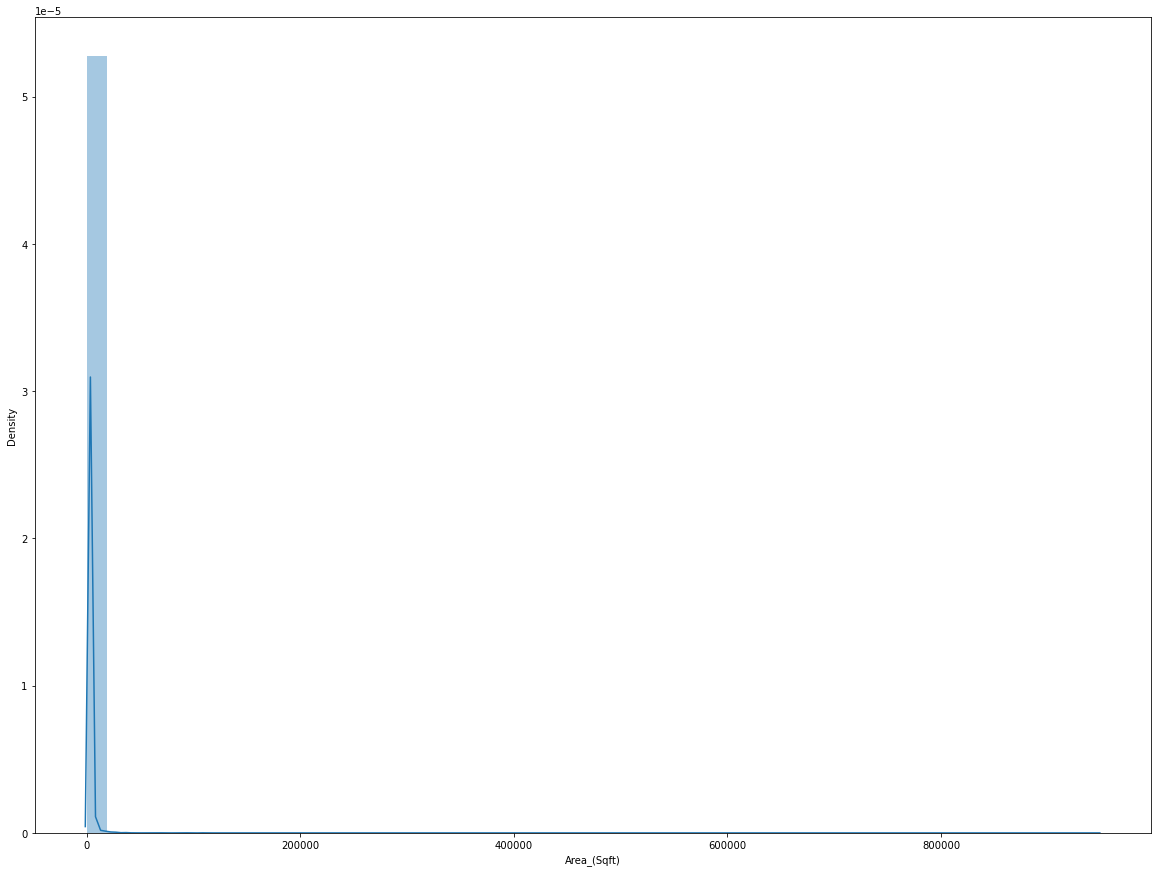

In [206]:
plt.figure(figsize= (20, 15))
sns.distplot(df['Area_(Sqft)'])

In [207]:
df1['logArea'] = np.log1p(df1['Area_(Sqft)'])

C:\Users\kentj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='logArea', ylabel='Density'>

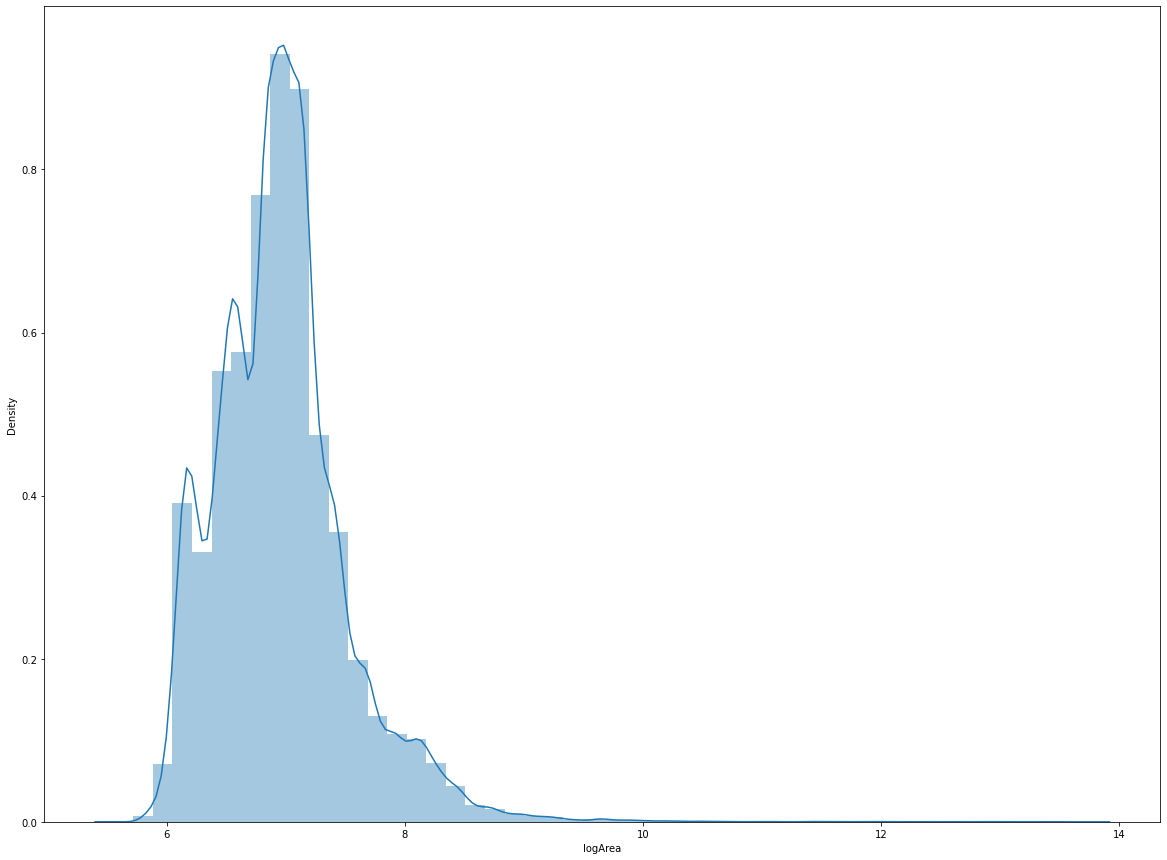

In [208]:
plt.figure(figsize= (20, 15))
sns.distplot(df1['logArea'])

In [210]:
df1 = df1.drop(columns = ['Area_(Sqft)','Price_($)'])
df1.head() #data is processed. 

,year,month,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28,avg_storey,freehold,logArea
0,2021,5,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,0,6.820016
1,2021,5,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,0,7.602401
2,2021,5,99,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,0,7.237059
3,2021,5,99,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23.0,0,6.909753
4,2021,5,99,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.0,0,7.535830


In [213]:
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,year,month,lease_years,Type_Apartment,Type_Condominium,Type_Detached,Type_Executive Condominium,Type_Semi-detached,Type_Strata Detached,Type_Strata Semi-detached,Type_Strata Terrace,Type_Terrace,Market_Segment_CCR,Market_Segment_OCR,Market_Segment_RCR,Type_of_Sale_New Sale,Type_of_Sale_Resale,Type_of_Sale_Sub Sale,Type_of_Area_Land,Type_of_Area_Strata,Postal_District_1,Postal_District_2,Postal_District_3,Postal_District_4,Postal_District_5,Postal_District_6,Postal_District_7,Postal_District_8,Postal_District_9,Postal_District_10,Postal_District_11,Postal_District_12,Postal_District_13,Postal_District_14,Postal_District_15,Postal_District_16,Postal_District_17,Postal_District_18,Postal_District_19,Postal_District_20,Postal_District_21,Postal_District_22,Postal_District_23,Postal_District_25,Postal_District_26,Postal_District_27,Postal_District_28,avg_storey,freehold,logArea
year,1.000000,-0.259853,0.001433,0.145779,-0.106940,0.006740,-0.066337,0.009017,0.001145,0.010288,-0.005331,0.012224,0.021989,-0.064610,0.053028,-0.038285,0.045938,-0.034323,0.016814,-0.016814,0.011445,0.008243,-0.024483,0.030565,0.061699,0.003252,0.092314,-0.014279,-0.006626,-0.008732,-0.001107,-0.018855,0.007448,0.011177,-0.011033,-0.035024,0.027344,0.053779,-0.010563,0.013649,0.064550,-0.081208,-0.052429,-0.033269,0.004564,-0.061323,-0.001720,-0.014323,0.008421,-0.026459
month,-0.259853,1.000000,-0.003502,0.001529,0.014290,0.004793,-0.034922,0.003118,0.002087,-0.003598,0.002455,0.010190,-0.018165,0.003080,0.010868,-0.017905,0.015353,0.011251,0.011674,-0.011674,-0.002490,0.003120,0.026608,-0.028077,-0.025392,0.000827,-0.068693,-0.004233,-0.005433,0.004399,0.007297,-0.002221,0.014676,0.025523,-0.015545,-0.025025,-0.005540,-0.041159,0.026585,0.021561,0.020998,0.014023,0.005299,0.006028,-0.002721,-0.008330,0.018481,-0.007591,0.014202,0.004251
lease_years,0.001433,-0.003502,1.000000,0.012968,-0.011429,0.006586,-0.016854,0.008973,0.001970,0.002192,0.001891,0.012229,0.013067,-0.021073,0.012681,-0.030276,0.028825,0.006272,0.021469,-0.021469,-0.004188,0.000127,-0.010534,-0.004597,-0.007236,-0.000337,-0.004922,0.026371,0.007457,0.012213,0.009746,0.006881,-0.003025,0.010907,0.017714,-0.003605,0.002593,-0.012553,-0.008361,-0.002990,0.007378,-0.006877,-0.005470,-0.005353,0.003333,-0.008909,-0.000649,-0.020106,0.070126,0.025595
Type_Apartment,0.145779,0.001529,0.012968,1.000000,-0.665309,-0.072170,-0.259696,-0.110257,-0.020525,-0.035830,-0.077160,-0.155411,0.100129,-0.234533,0.176594,0.236524,-0.240299,0.018328,-0.207188,0.207188,0.114937,0.122921,0.084744,-0.087399,0.163402,0.009573,0.144610,0.030256,0.058878,-0.023776,0.003428,0.086297,-0.002016,0.162850,0.066162,-0.111901,-0.061924,-0.199733,0.040733,-0.089402,-0.045769,-0.092740,-0.058195,-0.083554,-0.035879,-0.123013,-0.074520,0.164969,0.050328,-0.329619
Type_Condominium,-0.106940,0.014290,-0.011429,-0.665309,1.000000,-0.088669,-0.319064,-0.135463,-0.025217,-0.044021,-0.094799,-0.190939,-0.001820,-0.018446,0.021477,-0.193335,0.187736,0.023700,-0.256193,0.256193,-0.071625,-0.079985,0.017080,0.123421,-0.061201,-0.006369,-0.096210,0.007757,0.027610,0.054170,-0.003757,-0.028799,0.027808,-0.083701,-0.036654,0.117392,0.078627,0.201769,-0.183608,0.078996,0.082977,0.067120,-0.038092,-0.035249,0.002745,-0.069297,0.007713,0.042632,-0.080391,-0.013914
Type_Detached,0.006740,0.004793,0.006586,-0.072170,-0.088669,1.000000,-0.034611,-0.014695,-0.002735,-0.004775,-0.010283,-0.020712,0.069874,-0.027910,-0.024346,-0.089823,0.091003,-0.005830,0.346017,-0.346017,-0.009483,-0.009606,-0.022756,0.027661,-0.022234,-0.000691,-0.010437,-0.009027,-0.020825,0.064649,0.080435,-0.013090,0.009655,-0.011649,0.033698,-0.002872,0.002832,-0.025272,-0.017860,-0.000864,0.019122,-0.014512,-0.009024,-0.000562,-0.005002,-0.016985,0.004383,-0.099454,0.123131,0.352262
Type_Executive Condominium,-0.066337,-0.034922,-0.016854,-0.259696,-0.319064,-0.034611,1.000000,-0.052876,-0.009843,-0.017183,-0.037004,-0.074531,-0.148884,0.314709,-0.225596,0.163596,-0.1

In [212]:
df1.shape

(120921, 50)